In [25]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import kmeans

In [2]:
# graph separated data w/ plt
def plt_graph_sep_data(data):
    fig, ax = plt.subplots()
    for cl in data:
        ax.scatter(cl[:,0], cl[:,1])
    plt.show()

In [3]:
# Split data for display - plt
def split_data(data, labels):
    data_sep = []
    uniq_labels = list(set(sorted(labels)))
    for cl in uniq_labels:
        data_class = np.zeros((1,2))
        for i,lab in enumerate(labels):
            if(cl == lab):
                data_class = np.append(data_class, [data[i]], axis=0)
        data_class = data_class[1:]
        data_sep.append(data_class)
    return data_sep, uniq_labels

In [4]:
# Manually compute mean multivariate
def mean_mv( data):
    means = []
    # d is dimension (not sample)
    for d in data:
        sum = 0.0
        for val in d:
            sum += val
        means.append(sum/len(d))

    return means



# Estimate covariance matrix
def estimate_cov( data):
    n = len(data[0])
    d = len(data)
    covs = np.zeros((d,d))
    means = mean_mv(data)

    # dimension first data (d,n)
    for x in range(d):
        for y in range(d):
            x_v = (data[x] - means[x])
            y_v = (data[y] - means[y])
            covs[x,y] = np.sum(x_v * y_v) / n

    return np.array(covs)

In [5]:
# Eigenvalues
def evalues(cov):
    b = (-1 * cov[0][0]) - cov[1][1]
    c = (-1 * cov[0][1] * cov[1][0]) + (cov[0][0] * cov[1][1])

    l1 = .5 * (-1 * b + pow(b*b - (4 * c),.5))
    l2 = .5 * (-1 * b - pow(b*b - (4 * c),.5))

    return np.array([l1,l2])


# Eigenvectors
def evectors(cov,evals):
    ev01 = 1
    ev02 = cov[0][1] / (evals[0] - cov[0][0] + 0.00000001)

    ev11 = cov[0][1] / (evals[1] - cov[0][0] + 0.00000001)
    ev12 = 1

    return np.array([[ev01,ev02],[ev11,ev12]])

# Load iris

In [6]:
iris = datasets.load_iris()
x = iris.data[:, [0,3]]  # we only take the first two features.
y = iris.target

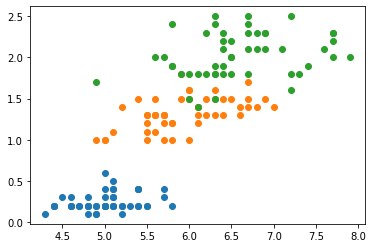

In [8]:
data_sep, uniq_labels = split_data(x, y)
plt_graph_sep_data(data_sep)

# Compute cov, eigenvects, eigenvals

In [68]:
# By hand

In [54]:
covs = []
means = []
for d in data_sep:
    covs.append(estimate_cov(d.T))
    means.append(mean_mv(d.T))
covs = np.array(covs)
means = np.array(means)

In [57]:
# evals = []
evects = []
for c in covs:
    evals = evalues(c)
    evects.append(evectors(c, evals) * evals)
evects = np.array(evects)

In [8]:
# numpy

In [9]:
covs = []
means = []
for d in data_sep:
    covs.append(np.cov(d.T))
    means.append(np.mean(d, axis=0))
covs = np.array(covs)
means = np.array(means)

In [14]:
evals = []
evects = []
for c in covs:    
    w, v = np.linalg.eig(c)
    evects.append(v*w)
    evals.append(w)
evects = np.array(evects)
evals = np.array(evals)

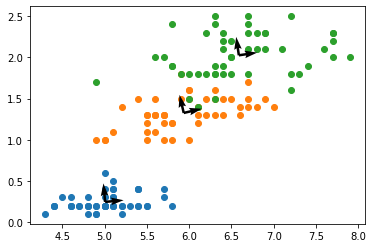

In [52]:
ax = plt.axes()
for i,c in enumerate(data_sep):    
    ax.scatter(c[:,0],c[:,1])
for i,c in enumerate(data_sep): 
    plt.quiver(means[i][0], means[i][1], *evects[i][:,0], )
    plt.quiver(means[i][0], means[i][1], *evects[i][:,1], )
plt.show()

In [40]:
centers = []
for d in data_sep:
    km = kmeans.KMeans(6)
    centers.append(km(d, error_target=.001))


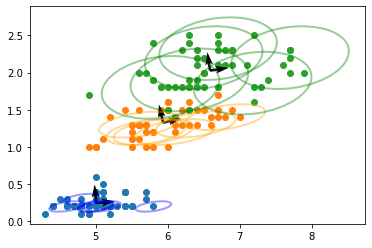

In [42]:
ax = plt.axes()
for i,c in enumerate(data_sep):    
    ax.scatter(c[:,0],c[:,1])
for i,c in enumerate(data_sep): 
    plt.quiver(means[i][0], means[i][1], *evects[i][:,0], )
    plt.quiver(means[i][0], means[i][1], *evects[i][:,1], )
colors = ['Blue','Orange','Green']
alpha = 4.0
for i,c in enumerate(centers): 
    for d in c:
        ellipse = Ellipse(xy=d, width=evals[i][0]*alpha, height=evals[i][1]*alpha*3, 
                        edgecolor=colors[i], fc='None', lw=2, angle=8, alpha=.4)
        ax.add_patch(ellipse)

plt.show()